# Simulate data from linear models

## Goals

-   Learn how to simulate data from a linear model of the data
    generating process (DGP)
-   See firsthand how well model fitting procedures like `lm` recovers
    the true values of the model parameters
-   Explore how p-values and effect sizes are distributed “under the
    null”
-   Explore how sample size (`n`) and amount of unexplained
    variation/error (`sd`) affect the false positives rate

## Why simulate data?

In the previous notebook, we used real data on veery behavior to fit
linear models. However, we never truly knew the “real” population
parameters.

Simulation lets you:

-   Specify a linear model with known parameter values as the “true”
    Data Generating Process (DGP) (a.k.a. the “population”)

-   Generate (simulate) a data set from this process/population

-   Fit the simulated data (e.g., using `lm`) to see if your estimates
    are close to the true values

-   Experiment with sample size and other parameters to see how it
    affects your ability to detect meaningful differences, or how easy
    it is to mistakenly calling a difference to be “statistically
    significant” when the true effect is zero. When you understand the
    mechanics of simulating data, you gain deeper insight into why
    inference algorithms like `lm` work and when they can fail

## Getting started

In [ ]:
suppressPackageStartupMessages({
  library(coursekata)
})

## Continuos predictor

### Data story

Suppose that the number of barks (`Barks`) a dog makes is linearly
related to its weight (`Weight`). We propose a simple model:

`Barks = β0 + β1·Weight + ϵ`

-   `β0` is the intercept, representing the hypothetical number of barks
    when a dog’s weight is 0.
-   `β1` is the slope, indicating the change in the number of barks for
    each 1-unit increase in weight.
-   `ϵ` represents random noise (assumed to be normally distributed)
    that captures the inherent variability in barking behavior.

### Specify model and simulate a single dataset

In [ ]:
set.seed(42)  # for reproducibility

n     <-  30  # sample size
beta0 <-  40  # true intercept
beta1 <- -0.4 # true slope
sd    <-  2   # true standard deviation of the error term

# Generate the continuos predictor variable (Weight) values, between 10 and 50 from a uniform distribution
Weight <- runif(n, min = 10, max = 50)
  
# Generate the response variable (Barks) values using the specified model
Barks <- beta0 + beta1 * Weight + rnorm(n, mean = 0, sd = sd)

# Combine into a data frame
df <- tibble(Weight, Barks)

# Check summary
summary(df)

     Weight         Barks     
 Min.   :13.3   Min.   :16.0  
 1st Qu.:28.0   1st Qu.:20.9  
 Median :36.0   Median :27.1  
 Mean   :34.6   Mean   :25.5  
 3rd Qu.:46.2   3rd Qu.:28.3  
 Max.   :49.6   Max.   :36.2  

# A tibble: 6 × 2
  Weight Barks
   <dbl> <dbl>
1   46.6  22.6
2   47.5  20.4
3   21.4  26.1
4   43.2  17.8
5   35.7  28.4
6   30.8  27.1

### Plot the data

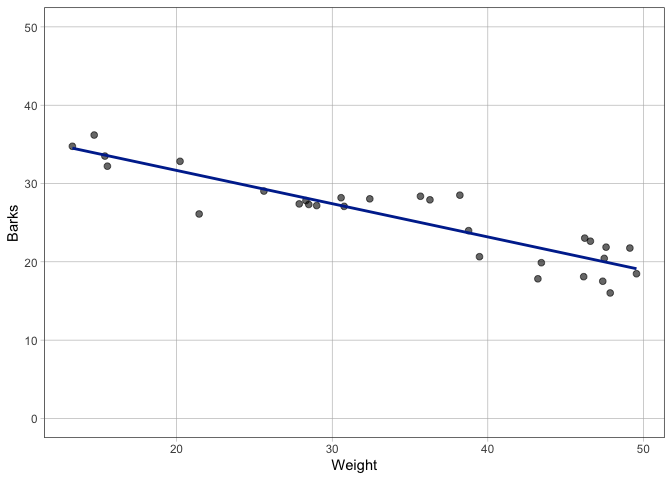

In [ ]:
gf_point(Barks ~ Weight, data = df) %>% gf_lm() %>% gf_lims(y = c(0, 50))

### Fit the linear model to the data

In [ ]:
m <- lm(Barks ~ Weight, data = df)

summary(m)


Call:
lm(formula = Barks ~ Weight, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-4.946 -1.242 -0.071  1.852  4.569 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  40.1589     1.3669    29.4 < 0.0000000000000002 ***
Weight       -0.4245     0.0375   -11.3      0.0000000000059 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.36 on 28 degrees of freedom
Multiple R-squared:  0.82,  Adjusted R-squared:  0.814 
F-statistic:  128 on 1 and 28 DF,  p-value: 0.00000000000594

## Categorical predictor

### Data story

Suppose that the expression level of a particular gene (`Gxp`) in cells
is influenced by whether the cells are treated with a drug. In this
experiment, cells are divided into two groups: one group remains
untreated (`Control`), and the other group is exposed to the drug
(`Drug`). We propose a simple model:

`Gxp = β0 + β1·Treatment + ϵ`

-   `β0` is the intercept, representing the average gene expression
    level in untreated cells (i.e., when `Treatment = 0/Control`)
-   `β1` is the slope, indicating how much gene expression changes on
    average when cells are treated with the drug
-   `ϵ` represents random noise (assumed to be normally distributed)
    that captures the inherent variability in gene expression
    measurements

This model allows us to quantify the drug’s impact by comparing the
baseline expression in the control group with the altered expression in
the treated group (i.e., `Treatment = 1/Drug` -
`Treatment = 0/Control`).

### Specify model and simulate a single dataset

In [ ]:
set.seed(42)  # for reproducibility

n     <- 30   # sample size
beta0 <- 20   # true intercept
beta1 <- 10   # true slope
sd    <- 2    # true standard deviation of the error term

# Generate the categorical predictor variable (Treatment) values, equally split between Control and Drug
Treatment <- rep(c("Control", "Drug"), each = floor(n / 2))
  
# Convert to binary predictor variable: 0 for Control, 1 for Drug
TreatmentBin <- ifelse(Treatment == "Drug", 1, 0)
  
# Generate the response variable (Gxp) values using the specified model
Gxp <- beta0 + beta1 * TreatmentBin + rnorm(n, mean = 0, sd = sd)

# Combine into a data frame
df <- tibble(Treatment, Gxp)

# Check summary
summary(df)

  Treatment              Gxp      
 Length:30          Min.   :17.2  
 Class :character   1st Qu.:20.8  
 Mode  :character   Median :24.6  
                    Mean   :25.1  
                    3rd Qu.:29.4  
                    Max.   :33.8  

# A tibble: 6 × 2
  Treatment   Gxp
  <chr>     <dbl>
1 Control    22.7
2 Control    18.9
3 Control    20.7
4 Control    21.3
5 Control    20.8
6 Control    19.8

### Plot the data

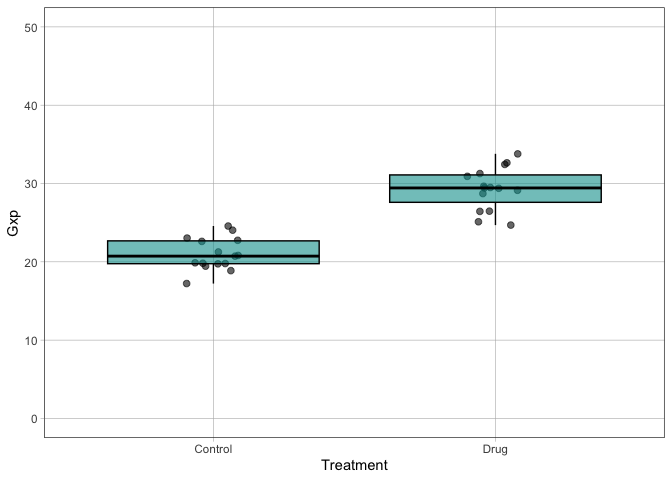

In [ ]:
gf_jitter(Gxp ~ Treatment, data = df, width = 0.1) %>% gf_boxplot() %>% gf_lims(y = c(0, 50))

### Fit the linear model to the data

In [ ]:
m <- lm(Gxp ~ Treatment, data = df)

summary(m)


Call:
lm(formula = Gxp ~ Treatment, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
 -4.62  -1.22  -0.04   1.74   4.49 

Coefficients:
              Estimate Std. Error t value             Pr(>|t|)    
(Intercept)     20.968      0.621   33.76 < 0.0000000000000002 ***
TreatmentDrug    8.337      0.878    9.49         0.0000000003 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.41 on 28 degrees of freedom
Multiple R-squared:  0.763, Adjusted R-squared:  0.754 
F-statistic: 90.1 on 1 and 28 DF,  p-value: 0.0000000003

## Task 1: Manual fitting with continous predictor

### Objective

Simulate a dataset using a model with a continuous predictor, then
manually adjust the intercept, slope, and error parameters to “fit” the
synthetic dataset provided (without being told the true values of the
parameters). Finally, compare your manually tuned parameters with the
estimates obtained from `lm()` and the ones used to generate the data.

### Instructions

1.  **Simulate the data:**
    -   Use a continuous predictor (e.g., Weight) and assume a model of
        the form:

        > Barks = β₀ + β₁ ⋅ Weight + ϵ

        where **β₀** represents the hypothetical number of barks when
        `Weight = 0`, **β₁** is the change in barks per unit increase in
        weight, and **ϵ** is normally distributed noise.

    -   Simulate your dataset.
2.  **Manual parameter fitting:**
    -   Without knowing the true generating parameters, experiment with
        different values for `beta0`, `beta1`, and `sd` (error standard
        deviation) to simulate data that “resemble/match” the observed
        data.
    -   Plot your manually generated predictions alongside the observed
        data to visualize the match.
3.  **Model fitting and comparison:**
    -   Fit the model using `lm()`.
    -   Compare your manually tuned parameter values with the estimates
        produced by `lm()` and, when given by your instructor, with the
        ones used to generate the data.

### Observed data

In [ ]:
csv_data <- 'Weight,Barks
46.5922417398542,35.2039720641373
47.4830165319145,32.888749501709
21.4455813914537,12.7534244330125
43.217905042693,24.28755173562
35.6698207557201,31.7952504150506
30.7638379652053,24.4620032003672
39.4635325856507,24.3878409908853
15.3866638895124,17.1775798774773
36.2796916160733,31.7838699055544
38.202591361478,34.7868760645339
28.3096710499376,22.8634281301502
38.7644900660962,28.6104368847413
47.386889886111,28.4039556874712
20.217152973637,21.4888685513123
28.4917129017413,22.3258718229903
47.6005809102207,35.166640824834
49.129057135433,36.6790405794029
14.6994944661856,20.4550577990026
28.9998832624406,22.6731625049986
32.4133098497987,27.7215202947933
46.1612554918975,27.9296017087287
15.5484067089856,15.4208263293543
49.5556691568345,32.2251117958877
47.8667293023318,26.690741701326
13.2975023239851,16.7571189826693
30.5684713739902,25.9022314875959
25.6081386841834,21.7208974464457
46.2295252364129,35.389252325305
27.8787851240486,21.7592780807946
43.4401703998446,27.6152420666644'

# Create a dataframe using read.csv with the text argument
df.obs <- read.csv(text = csv_data)

# Display the first few rows of the dataframe
head(df.obs)

  Weight Barks
1  46.59 35.20
2  47.48 32.89
3  21.45 12.75
4  43.22 24.29
5  35.67 31.80
6  30.76 24.46

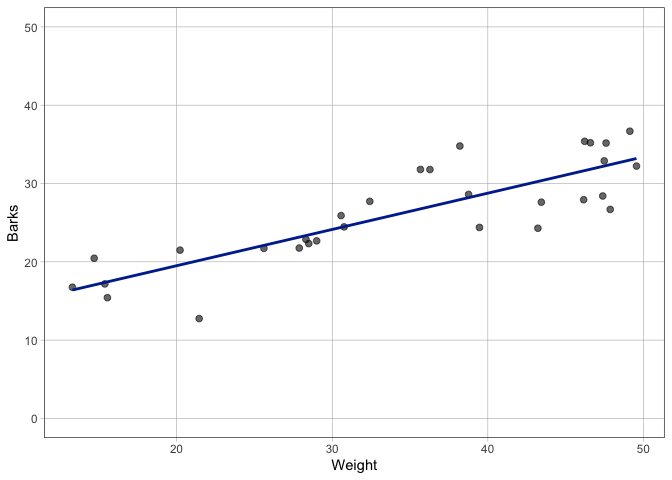

In [ ]:
gf_point(Barks ~ Weight, data = df.obs) %>% gf_lm() %>% gf_lims(y = c(0, 50))

### Helper function

In [ ]:
sim_data.cont <- function(n, beta0, beta1, sd) {
  
  # Generate the continuos predictor variable (Weight) values, between 10 and 50 from a uniform distribution
  Weight <- runif(n, min = 10, max = 50)
    
  # Generate the response variable (Barks) values using the specified model
  Barks <- beta0 + beta1 * Weight + rnorm(n, mean = 0, sd = sd)
  
  # Combine into a data frame
  df <- tibble(Weight, Barks)
  
  return(df)
}

### Example

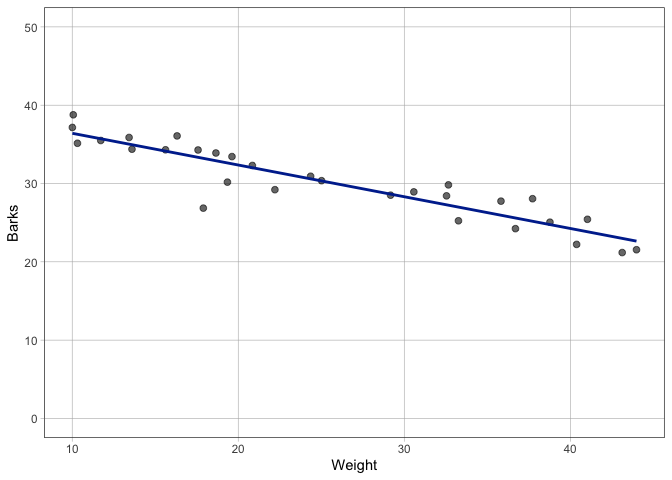

In [ ]:
df.sim <- sim_data.cont(n = 30, beta0 = 40, beta1 = -0.4, sd = 2)

gf_point(Barks ~ Weight, data = df.sim) %>% gf_lm() %>% gf_lims(y = c(0, 50))

## Task 2: Manual fitting with categorical predictor

### Objective

Simulate a dataset using a model with a categorical predictor, then
manually adjust the intercept, slope, and error parameters to “fit” the
synthetic dataset provided (without being told the true values of the
parameters). Finally, compare your manually tuned parameters with the
estimates obtained from `lm()` and the ones used to generate the data.

### Instructions

1.  **Simulate the data:**
    -   Use a categorical predictor (e.g., `Treatment` with levels
        `Control` and `Drug`).

    -   Assume a model of the form:

        > Gxp = β₀ + β₁ ⋅ Drug + ϵ

        where **β₀** is the baseline gene expression level in untreated
        cells, **β₁** is the effect of the drug treatment, and **ϵ** is
        normally distributed noise.

    -   Simulate your dataset.
2.  **Manual parameter fitting:**
    -   Without knowing the true generating parameters, experiment with
        different values for `beta0`, `beta1`, and `sd` (error standard
        deviation) to simulate data that “resemble/match” the observed
        data.
    -   Plot your manually generated predictions alongside the observed
        data to visualize the match.
3.  **Model fitting and comparison:**
    -   Fit the model using `lm()`.
    -   Compare your manually tuned parameter values with the estimates
        produced by `lm()` and, when given by your instructor, with the
        ones used to generate the data.

### Observed data

In [ ]:
csv_data <- 'Treatment,Gxp
Control,44.11287534144
Control,38.3059054858117
Control,41.089385234012
Control,41.8985878148831
Control,41.212804969423
Control,39.6816264517255
Control,44.5345659923168
Control,39.7160228847607
Control,46.0552711416311
Control,39.8118577028427
Control,43.9146089626705
Control,46.8599361781033
Control,35.833417896663
Control,39.1636336995479
Control,39.600035990819
Drug,37.9078511942102
Drug,35.1472412357518
Drug,28.0306337372857
Drug,28.6785992142734
Drug,39.9603400371906
Drug,35.0800842177646
Drug,30.65607469806
Drug,35.4842479327211
Drug,39.6440240975178
Drug,41.6855803837949
Drug,34.7085926051814
Drug,35.2281918516932
Drug,30.7105107444157
Drug,37.3802920644938
Drug,34.0800153721196'

# Create a dataframe using read.csv with the text argument
df.obs <- read.csv(text = csv_data)

# Display the first few rows of the dataframe
head(df.obs)

  Treatment   Gxp
1   Control 44.11
2   Control 38.31
3   Control 41.09
4   Control 41.90
5   Control 41.21
6   Control 39.68

### Helper function

In [ ]:
sim_data.cat <- function(n = 30, beta0 = 20, beta1 = 10, sd = 2) {
  
  # Generate the categorical predictor variable (Treatment) values, equally split between Control and Drug
  Treatment <- rep(c("Control", "Drug"), each = floor(n / 2))
    
  # Convert to binary predictor variable: 0 for Control, 1 for Drug
  TreatmentBin <- ifelse(Treatment == "Drug", 1, 0)
    
  # Generate the response variable (Gxp) values using the specified model
  Gxp <- beta0 + beta1 * TreatmentBin + rnorm(n, mean = 0, sd = sd)
  
  return(df)
}

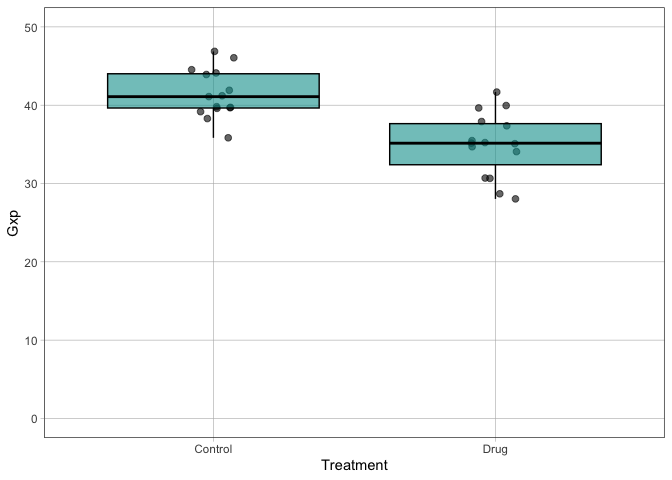

In [ ]:
gf_jitter(Gxp ~ Treatment, data = df.obs, width = 0.1) %>% gf_boxplot() %>% gf_lims(y = c(0, 50))

### Example

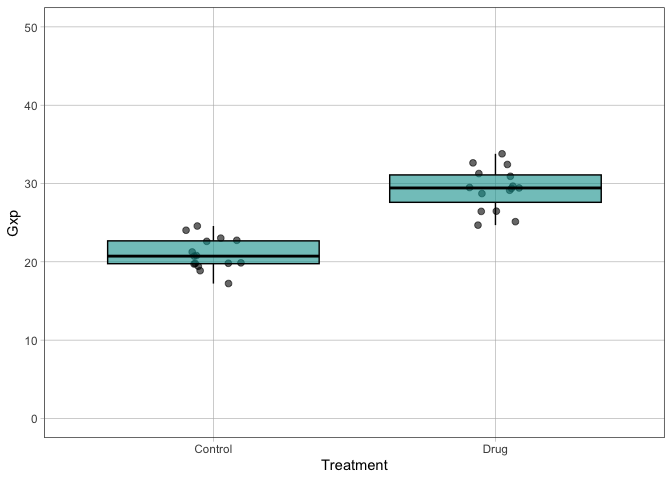

In [ ]:
df.sim <- sim_data.cat(n = 30, beta0 = 20, beta1 = 10, sd = 2)

gf_jitter(Gxp ~ Treatment, data = df.sim, width = 0.1) %>% gf_boxplot() %>% gf_lims(y = c(0, 50))

## Task 3: Simulation of multiple experiments with continuous predictor

### Objective

Perform a similar simulation study as in Task 3, but using a model with
a continuous predictor. Calculate the false positive rate at α = 0.05.

### Instructions

1.  **Simulation setup:**
    -   Use a model with a single continuous predictor (e.g., `Weight`).
    -   Set the true slope (`beta1`) to 0, meaning there is no real
        relationship between the predictor and the response.
2.  **Simulate 1000 datasets:**
    -   Simulate 1000 datasets using your chosen parameters.
    -   For each dataset, fit a linear model using `lm()` and extract
        the estimated slope and the p-value for the continuous
        predictor.
3.  **Visualization:**
    -   Plot histograms of the 1000 estimated slopes and the
        corresponding p-values.
    -   Analyze the distributions to understand the variability of the
        estimates under the null hypothesis.
4.  **Calculate the false positive rate:**
    -   Calculate the proportion of simulations where the p-value is
        less than 0.05. This proportion represents the false positive
        rate (Type I error rate) under the null hypothesis.
5.  **Extension:**
    -   Repeat the simulation with varying sample sizes, different error
        variances, or even with a non-zero slope.
    -   Discuss how these changes affect the distributions of the
        p-values, estimated slopes, and the false positive rate.

### Helper functions

In [ ]:
sim_pval.cont <- function(n, beta0, beta1, sd) {
  
  # Generate the continuos predictor variable (Weight) values, between 10 and 50 from a uniform distribution
  Weight <- runif(n, min = 10, max = 50)
    
  # Generate the response variable (Barks) values using the specified model
  Barks <- beta0 + beta1 * Weight + rnorm(n, mean = 0, sd = sd)
  
  # Fit the linear model
  model <- lm(Barks ~ Weight)
  
  # Extract and return the p-value for beta1 (the slope coefficient)
  pval <- summary(model)$coefficients[2, 4]
  
  return(c(pval = pval))
}

# Example usage
sim_pval.cont(n = 30, beta0 = 40, beta1 = -0.4, sd = 2)

               pval 
0.00000000000001797 

In [ ]:
sim_slope.cont <- function(n, beta0, beta1, sd) {
  
  # Generate the continuos predictor variable (Weight) values, between 10 and 50 from a uniform distribution
  Weight <- runif(n, min = 10, max = 50)
    
  # Generate the response variable (Barks) values using the specified model
  Barks <- beta0 + beta1 * Weight + rnorm(n, mean = 0, sd = sd)
  
  # Fit the linear model
  model <- lm(Barks ~ Weight)
  
  # Extract and return the estimated value of beta1 (the slope coefficient)
  slope <- summary(model)$coefficients[2, 1]
  
  return(c(slope = slope))
}

# Example usage
sim_slope.cont(n = 30, beta0 = 40, beta1 = -0.4, sd = 2)

  slope 
-0.3506 

### Example (pvals)

In [ ]:
pvals <- do(1000) * sim_pval.cont(n = 30, beta0 = 40, beta1 = -0.4, sd = 2)

head(pvals)

                   pval
1 0.0000000000004457013
2 0.0000000000000001316
3 0.0000000000017606495
4 0.0000000000000018214
5 0.0000000000006116841
6 0.0000000000000037468

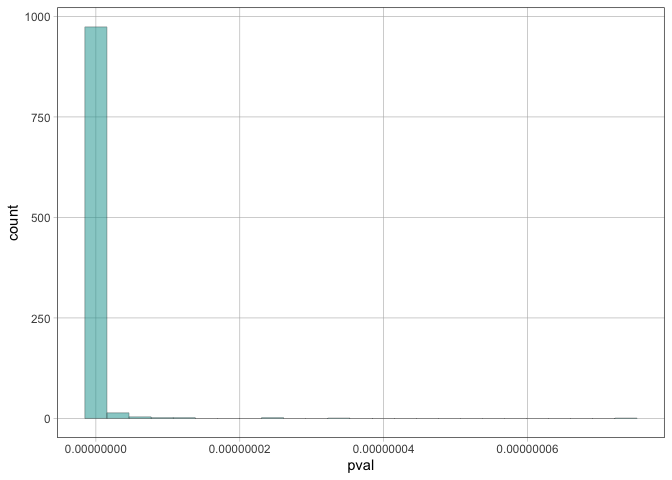

In [ ]:
pvals %>% gf_histogram(~ pval)

### Example (slopes)

In [ ]:
slopes <- do(1000) * sim_slope.cont(n = 30, beta0 = 40, beta1 = -0.4, sd = 2)

head(slopes)

    slope
1 -0.4468
2 -0.4014
3 -0.4431
4 -0.3836
5 -0.4228
6 -0.3855

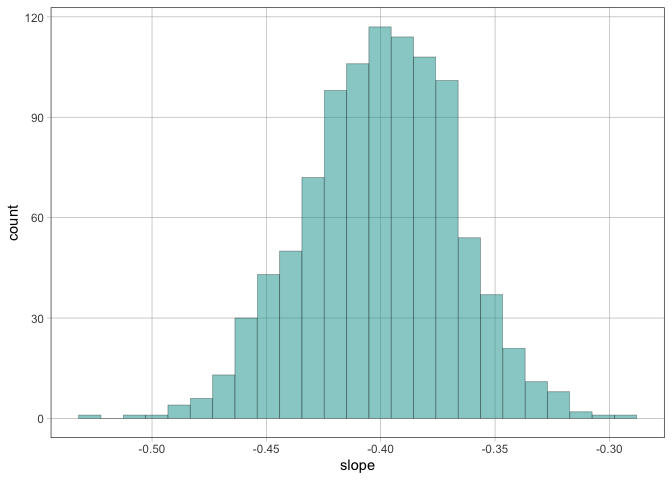

In [ ]:
slopes %>% gf_histogram(~ slope)

## Task 4: Simulation of multiple experiments with categorical predictor

### Objective

Investigate the behavior of p-values and estimated slopes when the true
effect is zero by simulating multiple datasets with a categorical
predictor, and calculate the false positive rate at α = 0.05.

### Instructions

1.  **Simulation setup:**
    -   Use a model with a single categorical predictor (e.g.,
        `Treatment` with levels `Control` and `Drug`).
    -   Set the true slope (`beta1`) to 0, meaning there is no real
        difference between groups.
2.  **Simulate 1000 datasets:**
    -   Simulate 1000 datasets using your chosen parameters.
    -   For each dataset, fit a linear model using `lm()` and extract
        the estimated slope and the p-value for the treatment effect.
3.  **Visualization:**
    -   Plot histograms of the 1000 estimated slopes and the
        corresponding p-values.
    -   Analyze the distributions to understand the variability of the
        estimates under the null hypothesis.
4.  **Calculate the false positive rate:**
    -   Compute the proportion of simulations in which the p-value is
        less than 0.05. This proportion represents the false positive
        rate (Type I error rate) under the null hypothesis.
5.  **Extension:**
    -   Repeat the simulation with varying sample sizes, different error
        variances, or even with a non-zero slope.
    -   Discuss how these changes affect the distributions of the
        p-values, estimated slopes, and the false positive rate.

### Helper functions

In [ ]:
sim_pval.cat <- function(n, beta0, beta1, sd) {
  
  # Generate the categorical predictor variable (Treatment) values, equally split between Control and Drug
  Treatment <- rep(c("Control", "Drug"), each = floor(n / 2))
    
  # Convert to binary predictor variable: 0 for Control, 1 for Drug
  TreatmentBin <- ifelse(Treatment == "Drug", 1, 0)
    
  # Generate the response variable (Gxp) values using the specified model
  Gxp <- beta0 + beta1 * TreatmentBin + rnorm(n, mean = 0, sd = sd)
  
  # Fit the linear model
  model <- lm(Gxp ~ Treatment)
  
  # Extract and return the p-value for beta1 (the slope coefficient)
  pval <- summary(model)$coefficients[2, 4]
  
  return(c(pval = pval))
}

# Example usage
sim_pval.cat(n = 30, beta0 = 20, beta1 = 10, sd = 2)

             pval 
0.000000000000782 

In [ ]:
sim_slope.cat <- function(n, beta0, beta1, sd) {
  
  # Generate the categorical predictor variable (Treatment) values, equally split between Control and Drug
  Treatment <- rep(c("Control", "Drug"), each = floor(n / 2))
    
  # Convert to binary predictor variable: 0 for Control, 1 for Drug
  TreatmentBin <- ifelse(Treatment == "Drug", 1, 0)
    
  # Generate the response variable (Gxp) values using the specified model
  Gxp <- beta0 + beta1 * TreatmentBin + rnorm(n, mean = 0, sd = sd)
  
  # Fit the linear model
  model <- lm(Gxp ~ Treatment)
  
  # Extract and return the estimated value of beta1 (the slope coefficient)
  slope <- summary(model)$coefficients[2, 1]
  
  return(c(slope = slope))
}

# Example usage
sim_slope.cat(n = 30, beta0 = 20, beta1 = 10, sd = 2)

slope 
10.27 

### Example (pvals)

In [ ]:
pvals <- do(1000) * sim_pval.cat(n = 30, beta0 = 20, beta1 = 10, sd = 2)

head(pvals)

                  pval
1 0.000000000000106403
2 0.000000000000012553
3 0.000000000000002582
4 0.000000000000003570
5 0.000000000000205441
6 0.000000000000686293

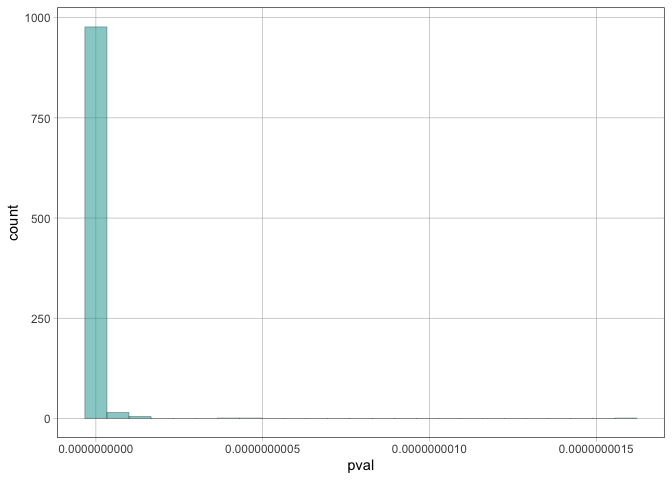

In [ ]:
pvals %>% gf_histogram(~ pval)

### Example (slopes)

In [ ]:
slopes <- do(1000) * sim_slope.cat(n = 30, beta0 = 20, beta1 = 10, sd = 2)

head(slopes)

   slope
1 11.115
2 10.303
3  9.223
4 10.489
5  9.660
6  9.441

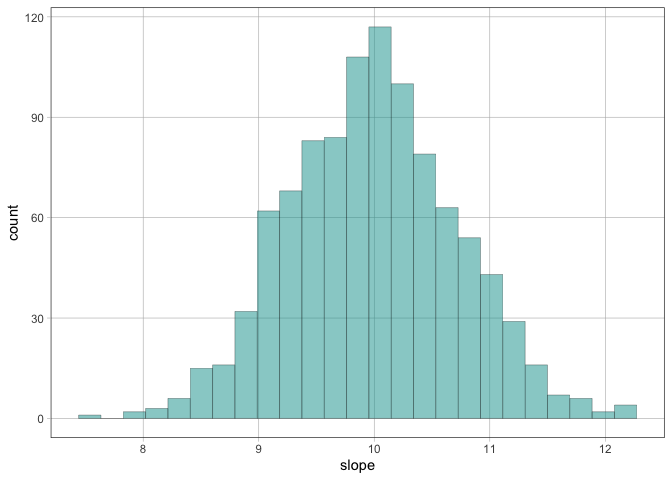

In [ ]:
slopes %>% gf_histogram(~ slope)